<a href="https://colab.research.google.com/github/VenissaCarolQuadros/COMP551/blob/dev1/COMP551_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_data(url, dest):
  response = requests.get(url)
  with open(dest, 'wb') as file:
      file.write(response.content)
  return

In [3]:
dest1= 'LinearRegression.xlsx'
read_data("https://raw.githubusercontent.com/VenissaCarolQuadros/COMP551/main/data/ENB2012_data.xlsx", dest1)
df1= pd.read_excel(dest1)

dest2= 'LogisticRegression.csv'
read_data('https://raw.githubusercontent.com/VenissaCarolQuadros/COMP551/main/data/Qualitative_Bankruptcy/Qualitative_Bankruptcy.data.txt', dest2)
df2= pd.read_csv(dest2, header=None)


In [4]:
print(df1.shape, df2.shape) ##Verifying dataset size
print( df1[df1.eq('?').any(1)],  df2[ df2.eq('?').any(1)]) #Checking for nulls
##No nulls found. Dataset size seems right

(768, 10) (250, 7)
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: [] Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6]
Index: []


<Figure size 360x360 with 0 Axes>

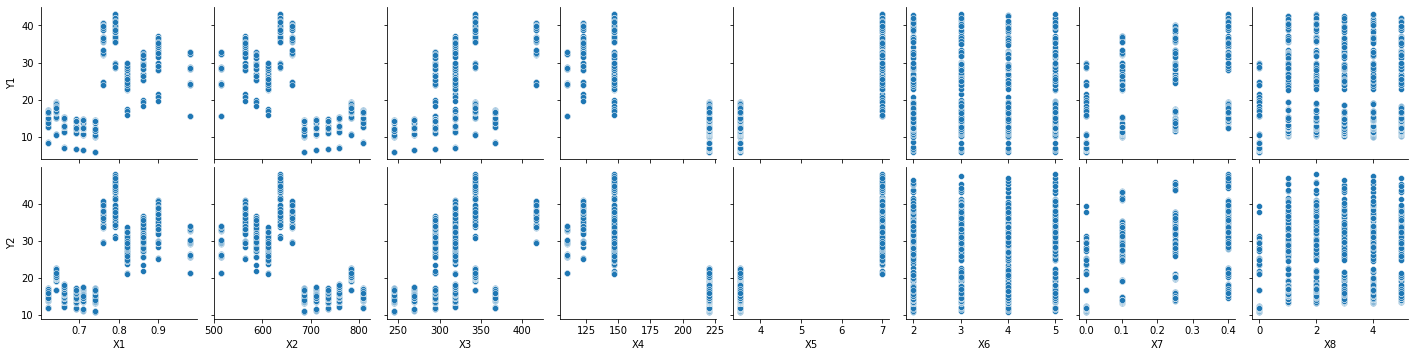

In [8]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df1, y_vars=['Y1','Y2'], x_vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
plt.show()

In [9]:

class GradientDescent:
    
    def __init__(self, learning_rate=.0001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
        self.cost_history=[]
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad, cost = gradient_fn(x, y, w)               # compute the gradient with present weight
            self.cost_history.append(cost)
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

##Linear Regression

In [11]:
class LinearRegression:
  def __init__(self):
    self.w=[]
  
  def editData(self):
    self.X= np.c_[np.ones((self.X).shape[0]), (self.X)] 
    return
  
  def fitClosedForm(self, X, Y):
    self.X=X
    self.Y=Y
    self.editData()
    self.w= np.linalg.inv((self.X).T @ (self.X))@ (self.X).T@ (self.Y)
    return


  def fitGD(self, X, Y, optimizer1, optimizer2):
        self.fitClosedForm(X, Y)
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            #print(grad.shape, (yh-y).shape, x.shape)
            return grad, .5*np.mean((yh - y)**2)
        w0 = np.zeros(self.X.shape[1])                            # initialize the weights 
        self.w[:,0] = optimizer1.run(gradient, self.X, self.Y[:,0], w0)      # run the optimizer to get the optimal weights
        self.w[:,1] = optimizer2.run(gradient, self.X, self.Y[:,1], w0) 
        return

  def predict(self, Xt):
    Xt= np.c_[np.ones((Xt).shape[0]), (Xt)] 
    return Xt @ self.w
  
  

##Analytical linear regression

In [39]:
#Train test split

train=df1.sample(frac=0.8)
test=df1.drop(train.index)

model1= LinearRegression()

X_train= train.iloc[:, :8].to_numpy(copy=True) 
X_train= X_train/ X_train.max(axis=0)
Y_train= train.iloc[:, 8:].to_numpy(copy=True)

model1.fitClosedForm(X_train, Y_train)

X_test= test.iloc[:, :8].to_numpy(copy=True)
X_test= X_test/ X_test.max(axis=0)
Y_test= test.iloc[:, 8:].to_numpy(copy=True)

Ypredict=model1.predict(X_test)
#print(np.c_[Y_test, Ypredict])
loss=0.5*np.mean((Y_test-Ypredict)**2, axis=0)
print(loss)

[4.73522264 5.95031251]


## Extra with gradient descent

In [46]:
optimizer1 = GradientDescent(learning_rate=.5, max_iters=1e4, record_history=False)
optimizer2 = GradientDescent(learning_rate=.5, max_iters=1e4, record_history=False)
model= LinearRegression()
model.fitGD(X_train, Y_train, optimizer1, optimizer2)

In [50]:
Ypredict=model.predict(X_test)
#print(np.c_[Y_test, Ypredict])
loss=0.5*np.mean((Y_test-Ypredict)**2, axis=0)
print(loss)

[4.7596524  5.77377796]


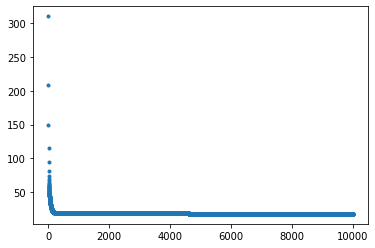

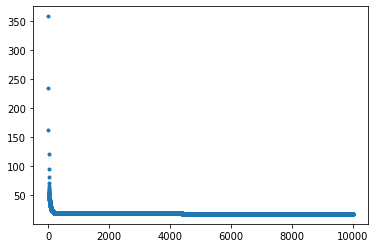

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(optimizer1.cost_history)), optimizer1.cost_history, '.')
plt.show()
plt.plot(np.arange(len(optimizer2.cost_history)), optimizer2.cost_history, '.')
plt.show()

## Logistic Regression

In [ ]:
df2.head()

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [ ]:
check_nan = df2.isnull().values.any()
print(check_nan)

False


In [ ]:
## One-hot encoding for categorical data
data2= pd.get_dummies(df2, dummy_na=False, columns=df2.columns[:-1])
data2[6].replace(['NB', 'B'], [0, 1], inplace=True)
data2.head()

,6,0_A,0_N,0_P,1_A,1_N,1_P,2_A,2_N,2_P,3_A,3_N,3_P,4_A,4_N,4_P,5_A,5_N,5_P
0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))
class LogisticRegression:
  
  def editData(self):
    self.X= np.c_[np.ones((self.X).shape[0]), (self.X)] 
    return

  def fitGD(self, X, Y, optimizer):
      self.X= X
      self.Y= np.squeeze(Y)
      self.editData()
      def gradient(x, y, w):
          N,D = x.shape
          yh = logistic(x @ w)   # predictions  size N
          grad = np.dot(yh-y, x)/N
          return grad, self.cost_fn(x,y,w)
      w0 = np.zeros(self.X.shape[1])                            # initialize the weights
      #print(self.X.shape, w0.shape) 
      self.w = optimizer.run(gradient, self.X, self.Y, w0)      # run the optimizer to get the optimal weights
      return self.w

  def cost_fn(self, x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

  def predict(self, Xt):
    Xt= np.c_[np.ones((Xt).shape[0]), (Xt)] 
    return logistic(Xt @ self.w)
 

In [ ]:
train=data2.sample(frac=0.8,random_state=200)
test=data2.drop(train.index)

X_train= train.iloc[:, 1:].to_numpy(copy=True) 
Y_train= train.iloc[:, :1].to_numpy(copy=True)

X_test= test.iloc[:, 1:].to_numpy(copy=True) 
Y_test= test.iloc[:, :1].to_numpy(copy=True)

In [ ]:
optimizer = GradientDescent(learning_rate=.0001, max_iters=500, record_history=False)
model= LogisticRegression()
W=model.fitGD(X_train, Y_train, optimizer)

In [ ]:
print(W)

[-0.0068538  -0.00368203  0.00345934 -0.00663112 -0.00442101  0.00469067
 -0.00712346 -0.01355546  0.01780514 -0.01110348 -0.0086153   0.01556843
 -0.01380693 -0.00789931  0.02028653 -0.01924102 -0.00196258  0.00321177
 -0.00810299]


In [ ]:
Ypredict=model.predict(X_test)
print(model.cost_fn(np.c_[np.ones((X_test).shape[0]), (X_test)] , Y_test, W))

0.6928774603333228
